In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


 
                                  Data Preprocessing

                                  

In [27]:
# Step 1: Data Preprocessing
# Load the dataset
df = pd.read_csv("Customers_Satisfaction_Survey.csv")
df

,Age,Gender,Income,Household_Size,Overall_Satisfaction,Average_Spend,Education_Level,Employment_Status,Marital_Status,Location,...,Ease_of_Shopping,Communication_Preferences,Social_Media_Engagement,Membership_Program_Interest,Shopping_Triggers,Brand_Perception,Competitor_Awareness,Online_Shopping_Habits,App_Usage,Tech_Savviness
0,48,Male,9554.46,3,2,596.66,High School,Retired,Divorced,Suburban,...,2,Email,1,5,Advertisements,Quality,3,1,2,3
1,32,Female,5854.62,2,5,568.42,High School,Full-time,Married,Urban,...,1,SMS,4,3,Advertisements,Quality,5,5,5,5
2,68,Female,3630.70,5,5,477.09,Undergraduate,Full-time,Single,Suburban,...,2,Social Media,5,2,Word of Mouth,Value for Money,2,1,5,2
3,31,Male,9967.86,1,1,597.31,Undergraduate,Unemployed,Divorced,Suburban,...,3,SMS,1,2,Word of Mouth,Exclusivity,2,4,3,2
4,20,Female,2730.79,6,3,474.31,High School,Self-employed,Married,Rural,...,5,Social Media,4,5,Word of Mouth,Exclusivity,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,63,Male,3961.91,5,4,542.12,Undergraduate,Full-time,Married,Urban,...,5,SMS,4,2,Word of Mouth,Exclusivity,4,1,2,1
196,38,Female,3100.64,6,1,436.62,High School,Full-time,Married,Rural,...,5,Email,2,1,Necessity,Quality,3,3,3,3
197,62,Female,8579.44,4,4,676.98,Postgraduate,Part-time,Married,Suburban,...,1,Social Media,1,2,Advertisements,Value for Money,3,4,3,2
198,19,Male,3942.82,3,2,308.14,Postgraduate,Student,Widowed,Urban,...,5,Social Media,3,1,Word of Mouth,Value for Money,5,4,4,2


In [29]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            200 non-null    int64  
 1   Gender                         200 non-null    object 
 2   Income                         200 non-null    float64
 3   Household_Size                 200 non-null    int64  
 4   Overall_Satisfaction           200 non-null    int64  
 5   Average_Spend                  200 non-null    float64
 6   Education_Level                200 non-null    object 
 7   Employment_Status              200 non-null    object 
 8   Marital_Status                 200 non-null    object 
 9   Location                       200 non-null    object 
 10  Shopping_Frequency             200 non-null    object 
 11  Product_Preferences            200 non-null    object 
 12  Shopping_Time                

In [31]:
# Handle missing values by dropping rows with NA values
df = df.dropna()
df

,Age,Gender,Income,Household_Size,Overall_Satisfaction,Average_Spend,Education_Level,Employment_Status,Marital_Status,Location,...,Ease_of_Shopping,Communication_Preferences,Social_Media_Engagement,Membership_Program_Interest,Shopping_Triggers,Brand_Perception,Competitor_Awareness,Online_Shopping_Habits,App_Usage,Tech_Savviness
0,48,Male,9554.46,3,2,596.66,High School,Retired,Divorced,Suburban,...,2,Email,1,5,Advertisements,Quality,3,1,2,3
1,32,Female,5854.62,2,5,568.42,High School,Full-time,Married,Urban,...,1,SMS,4,3,Advertisements,Quality,5,5,5,5
2,68,Female,3630.70,5,5,477.09,Undergraduate,Full-time,Single,Suburban,...,2,Social Media,5,2,Word of Mouth,Value for Money,2,1,5,2
3,31,Male,9967.86,1,1,597.31,Undergraduate,Unemployed,Divorced,Suburban,...,3,SMS,1,2,Word of Mouth,Exclusivity,2,4,3,2
4,20,Female,2730.79,6,3,474.31,High School,Self-employed,Married,Rural,...,5,Social Media,4,5,Word of Mouth,Exclusivity,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,63,Male,3961.91,5,4,542.12,Undergraduate,Full-time,Married,Urban,...,5,SMS,4,2,Word of Mouth,Exclusivity,4,1,2,1
196,38,Female,3100.64,6,1,436.62,High School,Full-time,Married,Rural,...,5,Email,2,1,Necessity,Quality,3,3,3,3
197,62,Female,8579.44,4,4,676.98,Postgraduate,Part-time,Married,Suburban,...,1,Social Media,1,2,Advertisements,Value for Money,3,4,3,2
198,19,Male,3942.82,3,2,308.14,Postgraduate,Student,Widowed,Urban,...,5,Social Media,3,1,Word of Mouth,Value for Money,5,4,4,2


In [33]:
# Encode categorical variables using LabelEncoder
categorical_columns = [
    'Gender', 'Education_Level', 'Employment_Status', 
    'Marital_Status', 'Location', 'Shopping_Frequency', 
    'Shopping_Channels', 'Delivery_Pickup_Preferences', 
    'Communication_Preferences', 'Brand_Perception', 
    'Shopping_Triggers'
]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


           
                             Exploratory Data Analysis (EDA)

                             

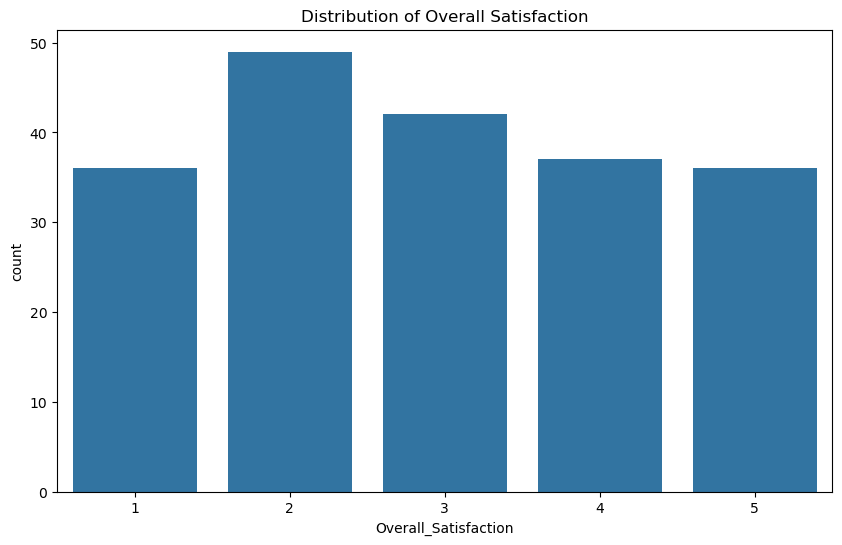

In [38]:
# Visualize data distributions and correlations
plt.figure(figsize=(10, 6))
sns.countplot(x='Overall_Satisfaction', data=df)
plt.title("Distribution of Overall Satisfaction")
plt.show()

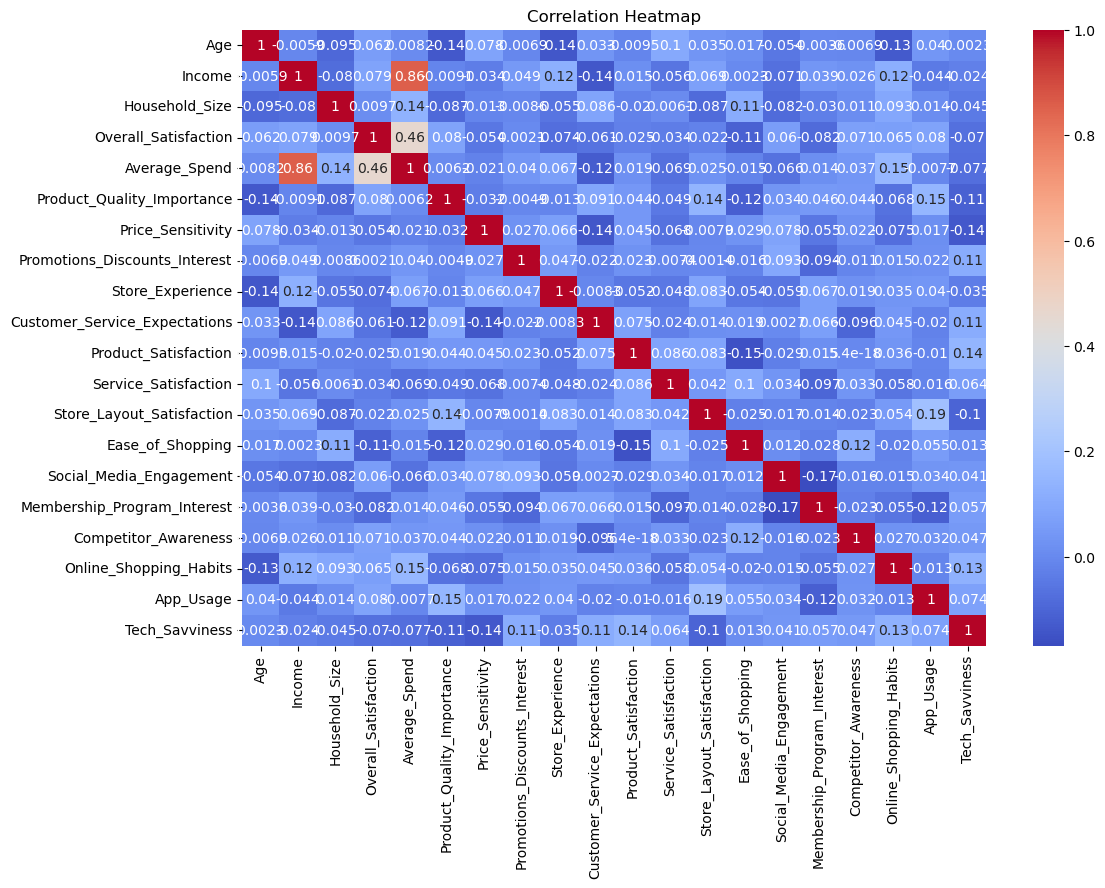

In [42]:
# Correlation heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # Filter numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



                                    Feature Engineering



In [47]:
# Define the feature set X and the target variable y
X = df[[
    'Age', 'Income', 'Household_Size', 'Average_Spend', 
    'Education_Level', 'Employment_Status', 'Marital_Status', 
    'Shopping_Frequency', 'Product_Quality_Importance', 
    'Price_Sensitivity', 'Promotions_Discounts_Interest', 
    'Store_Experience', 'Customer_Service_Expectations', 
    'Product_Satisfaction', 'Service_Satisfaction', 
    'Store_Layout_Satisfaction', 'Ease_of_Shopping', 
    'Social_Media_Engagement', 'Membership_Program_Interest', 
    'Competitor_Awareness', 'Online_Shopping_Habits', 
    'App_Usage', 'Tech_Savviness']]  
y = df['Overall_Satisfaction']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




                                 Feature Scaling



In [50]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



                                    Model Building



In [53]:
# Train a RandomForestClassifier on the training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Predict customer satisfaction on the test data
y_pred = rf_model.predict(X_test)



                                    Model Evaluation

                                    

In [58]:
# Evaluate the model using metrics like accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.25


In [60]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.30      0.40        10
           2       0.25      0.38      0.30         8
           3       0.00      0.00      0.00         8
           4       0.12      0.20      0.15         5
           5       0.43      0.33      0.38         9

    accuracy                           0.25        40
   macro avg       0.28      0.24      0.25        40
weighted avg       0.31      0.25      0.26        40




Confusion Matrix:



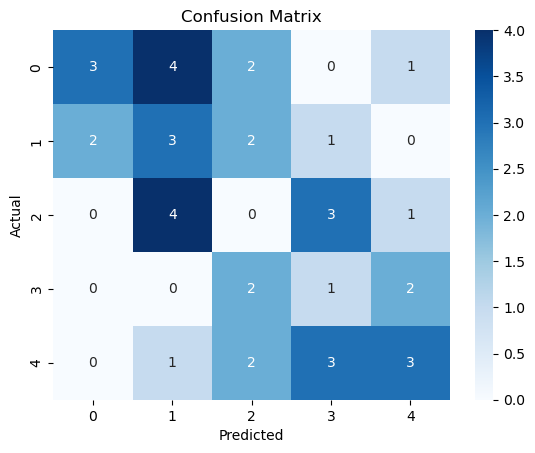

In [82]:
print("\nConfusion Matrix:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [84]:
# Visualize the top 10 feature importances
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[3 4 2 0 1]
 [2 3 2 1 0]
 [0 4 0 3 1]
 [0 0 2 1 2]
 [0 1 2 3 3]]


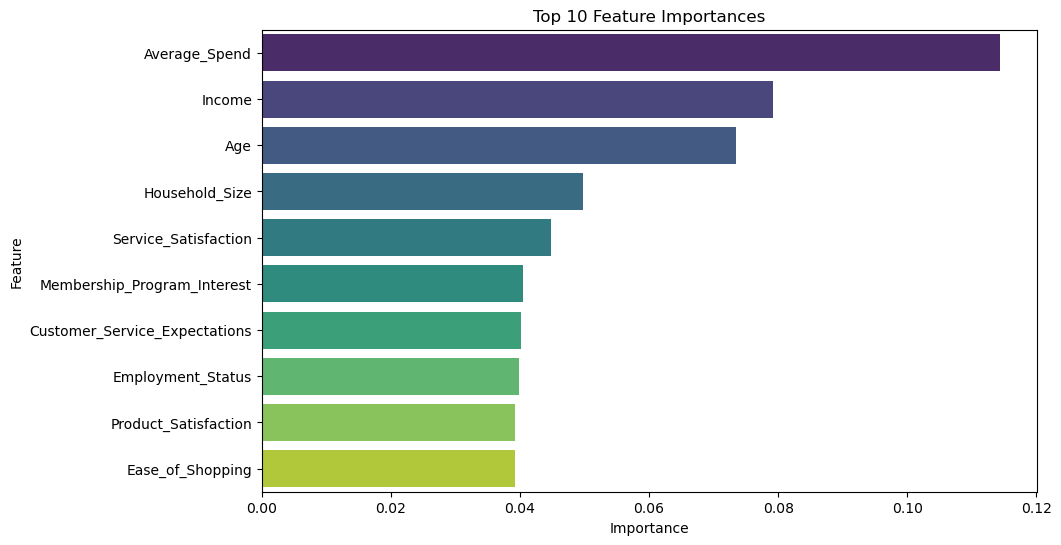

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False )
plt.title("Top 10 Feature Importances")
plt.show()